# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

###### Introduction

I am very new to using Matplotlib and just didn't have enough time to learn how to harness all of its power to visualize the types of things I wanted to. However, I've done my best with my limited knowledge and plotted images from my various datasets as you'll soon see below. I look forward to learning more of Matplotlib as I see tremendous value in being able to visualize data.

To make things easy when visualizing the traffic signs, let's first print the traffic sign names as well as some additional metrics about the dataset.

In [19]:
import numpy as np

from datasets.german_traffic_signs import GermanTrafficSignDataset

# NOTE I explain these two lines in greater details below
data = GermanTrafficSignDataset(verbose=False)
data.configure(one_hot=True, train_validate_split_percentage=0.2)

print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.2
 
Training size:               31367
Validation size:             7842
Testing size:                12630
Predicting size:             13
Total classes:               43
 
Training orig shape:         (31367, 32, 32, 3)
Training gray shape:         (31367, 32, 32)
Training flat shape:         (31367, 1024)
 
Validation orig shape:       (7842, 32, 32, 3)
Validation gray shape:       (7842, 32, 32)
Validation flat shape:       (7842, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Predicting orig shape:       (13, 32, 32, 3)
Predicting gray shape:       (13, 32, 32)
Predicting flat shape:       (13, 1024)
 
Training label shape:        (31367, 43)
Validation flat label shape: (7842, 43)
Testing gray label shape:    (12630, 43)
 
Sign names:
 
  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)


### Traffic Sign Visualizations

##### Training Set

Plotting training images 11575,29742,1783,9191,7548,20920,28780,33358,19593,38844,23314,15481,13518,1811,34970,22190,28566,25280,5764,34208,1490,38381,185,27427


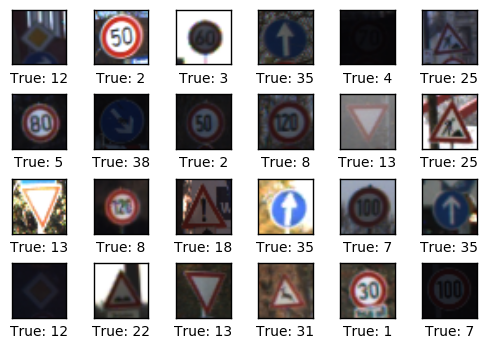

In [14]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_training)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting training images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.train_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.train_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Validation Set

Plotting validation images 3,8,33,34,36,32,19,31,35,37,4,30,27,29,7,12,5,21,0,2,17,1,20,14


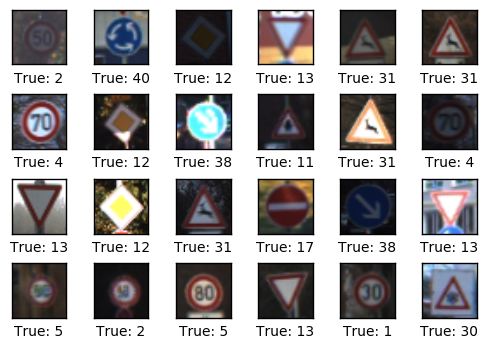

In [15]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_validation)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting validation images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.validate_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.validate_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Testing Set

Plotting testing images 10553,7443,9998,9274,8381,12082,8931,10462,5417,513,6022,8186,3569,3095,6183,4484,3357,10780,6584,5747,5206,6422,1300,5800


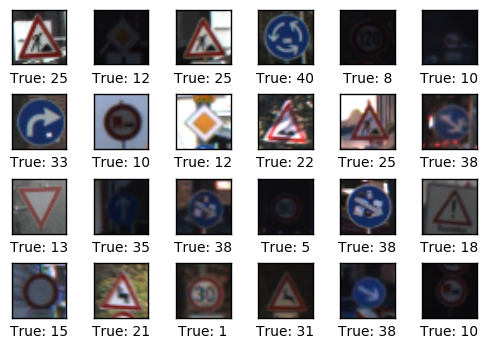

In [17]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_testing)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting testing images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.test_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.test_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

### Dataset preparation

First, let's construct a fresh German Traffic Sign dataset. Nothing fancy goes on here but things are about to get awesome really quickly. Stay tuned!

>**NOTE** If you pass *verbose=True* to the GermanTrafficSignDataset, you'll see some logs printed informing us about what it's doing during the configuration process.

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset(verbose=False)
```

Next, let's configure the dataset. We're going to ask it to set aside 20% of the training dataset for validation purposes when we're training our model. We're also going to ask it to One-Hot Encode the training, validation, test and prediction labels so we don't have to do any work later on.

```python
# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

### GermanTrafficSignDataset Code Review

>**TIP** I encourage you to take a look at the code that went into preprocessing the dataset for network training. Here are some links directly to the code in github, line for line.


###### #configure

[data.configure(one_hot=True, train_validate_split_percentage=0.20)](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L49-L99 "data.configure(one_hot=True, train_validate_split_percentage=0.20)")



>**NOTE** The following methods are invoked by #configure in sequential order.

###### #__generate_prediction_dataset

_Reads in all images from the images/predictables directory and puts them into data/predict.p_

[data.__generate_prediction_dataset](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L251-L283)

###### #__load_data

_Loads in train features and labels and test features and labels from their respective pickle file_

[data.__load_data](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L285-L307 "data.__load_data")


###### #__split_train_and_validation

_Constructs randomized datasets for training and validation_

[data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L309-L322)


###### #__compute_metrics

[data.__compute_metrics](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L324-L333)



###### #__prepare_images

_Prepares the images for training, validation, testing and visualization._

[data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L335-L427)



###### #__one_hot_encode_labels

_When one-hot encoding is enabled, the train, validate and test labels are one-hot encoded using LabelBinarizer._

[data.__one_hot_encode_labels](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L429-L457)

That was easy! Almost too easy, really. What's actually going on there?

Let's print the documentation for the GermanTrafficSignDataset#configure method to uncover the magic and reveal the tecniques I used to preprocess the data.

In [5]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset_configure_docs.png"))

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Inside of [data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L254-L267 "data.__split_train_and_validation") I leverage SKLearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) convenience method. It's great because it automatically randomizes the validation set based on a predetermined percentage. I chose the traditional 80/20 split out of habit and felt that if I achieved a high accuracy with 80% of the training data, this should generalize well enough to the other 20% as well as the testing and prediction sets.

>**NOTE:** I'm using a fixed random_state number so my testing is relatively predictable and consistent across runs.

```python
def __split_train_and_validation(self):
    """
    Get randomized datasets for training and validation
    """

    self.train_orig, self.validate_orig, self.train_labels, self.validate_labels = train_test_split(
        self.train_orig,
        self.train_labels,
        test_size=self.split_size,
        random_state=832224)

    print('Training features and labels randomized and split with train_test_split (validation % of training set: {})'.format(self.split_size))
```

You can also see it in github [here](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L254-L267 "here").

The second phase of splitting my data may be discovered inside of [data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L278-L355). 

For convenience, here is the documentation for __prepare_images.

In [6]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset___prepare_images_docs.png"))

Finally, let's print our instance of GermanTrafficSignDataset. It reveals a ton of information about the contents of the **data** variable such as the number and shape of items in each bucket and the traffic sign names corresponding to each label.

In [7]:
print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.2
 
Training size:               31367
Validation size:             7842
Testing size:                12630
Predicting size:             13
Total classes:               43
 
Training orig shape:         (31367, 32, 32, 3)
Training gray shape:         (31367, 32, 32)
Training flat shape:         (31367, 1024)
 
Validation orig shape:       (7842, 32, 32, 3)
Validation gray shape:       (7842, 32, 32)
Validation flat shape:       (7842, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Predicting orig shape:       (13, 32, 32, 3)
Predicting gray shape:       (13, 32, 32)
Predicting flat shape:       (13, 1024)
 
Training label shape:        (31367, 43)
Validation flat label shape: (7842, 43)
Testing gray label shape:    (12630, 43)
 
Sign names:
 
  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is a simple three layer linear neural network with a single hidden layer. The hidden layer has 512 neurons because after a bit of research, it appears the rule-of-thumb baseline for hidden layer neurons is to calculate the mean of the intput and output nurons.

I built a simple framework allowing me to rapidly test various hyper parameters to obtain the most optimal model to yield the highest accuracy against photos I took myself.

Each implementation of BaseNeuralNetwork essentially needs to override two methods: *#fit* and *#predict*. I ultimately plan to implemente a Convolutional Neural Network. However, I am aware that Convnets will yield more accurate prediction the more layers you have but I wanted to truly grasp the fundamentals of Neural Networks, Gradient Descent optimizers, hyperparameter optimization, dataset splitting, trained model persistence and restoration to predict against later on (something we'd do in a production setting), and so much more.

### Single Layer Network Architecture Explained
##### Abstract

The very first network I put together was a simple three layer linear neural network with a single hidden layer with 512 neurons inspired by the first 
TensorFlow lab we did in class. It allowed me to education and familiarize myself with Python, Numpy, Matplotlib 
and TensorFlow.

> **NOTE** I've never coded in Python, Numpy, Jupyter Notebook, TensorFlow or Matplotlib until now so it took me longer than desired to get this far but I am satisfied with my first attempt and I am more comfortable now than I was when I first started.

##### Model Training Walkthrough

I've already discussed the steps necessary to prepare the dataset we'll be using to train the network.

Let's now define our hyper parameters. We will be feeding them into the network's configuration context next.

```python
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=512,
    start_learning_rate=0.2, 
    epochs=200, 
    batch_size=20, 
    required_accuracy_improvement=50
)
```

An instance of [ConfigurationContext](https://github.com/matthewzimmer/traffic-sign-classification/blob/be3f9451be99d17e5366f1117ae7e24fad7123d9/classifiers/base_neural_network.py#L40-L54) holds a reference to our GermanTrafficSignDataset instance variable and our SingleLayerHyperParametersContext instance variable.

>**NOTE** This object is required by all _BaseNeuralNetwork_ implementations. Otherwise training will not function.

```python
from classifiers.base_neural_network import ConfigurationContext

config_context = ConfigurationContext(dataset=data, optimizer=ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT, hyper_parameters=hyper_parameters)
```

First thing's first, let's instantiate the SingleLayerLinear class.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()```

Next, let's configure our network passing in our ConfigurationContext instance variable we instantiated above.

This is the principle entry point into all _BaseNeuralNetwork_ implementations. 

>**NOTE** The network will not function without a proper configuration context.

```python
simple_nn.configure(config_context)
```

To train the network, we call the generate method. This could take anywhere from 10 minutes to several hours depending on hardware and hyperparameter settings.

>**NOTE** *#configure* must be called first.

```python
simple_nn.generate()
```

##### Model Prediction Code Example

To predict against a previously trained network, we call the *BaseNueralNetwork#predict* method.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear
from datasets.german_traffic_signs import GermanTrafficSignDataset

# I put my captured photos inside of GermanTrafficSignDataset so we need 
# inject the predict_flat images into #predict.
data = GermanTrafficSignDataset()
data.configure(one_hot=True)

simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(dataset=data, hyper_parameters=SingleLayerHyperParametersContext()))
simple_nn.predict(images=data.predict_flat, labels=data.predict_labels, model_name='SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B')
```

##### SingleLayerLinear Class Definition

```python
import tensorflow as tf
import numpy as np
import math
import os

from classifiers.base_neural_network import BaseNeuralNetwork, HyperParametersContext


class SingleLayerHyperParametersContext(HyperParametersContext):
    def __init__(
            self,
            hidden_layer_neuron_count=512,
            **kwargs
    ):
        """

        :param hidden_layer_neuron_count: number of neurons for the hidden layer
        :param kwargs: Arguments to pass into to super constructor
        """
        super(SingleLayerHyperParametersContext, self).__init__(**kwargs)
        self.hidden_layer_neuron_count = hidden_layer_neuron_count


class SingleLayerLinear(BaseNeuralNetwork):
    def fit(self):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes
        num_training = data.num_training

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)
        initial_learning_rate = hyper_parameters.start_learning_rate

        # decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
        decayed_learning_rate = tf.train.exponential_decay(learning_rate=initial_learning_rate, global_step=global_step, decay_steps=75000, decay_rate=0.96, staircase=True)

        training_epochs = hyper_parameters.epochs
        batch_size = hyper_parameters.batch_size
        batch_count = int(math.ceil(num_training / batch_size))
        display_step = 1

        n_hidden_layer = hyper_parameters.hidden_layer_neuron_count

        # Store layers weight & bias
        weights = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer]), name='weights_hidden_layer'),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]), name='weights_out')
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='biases_hidden_layer'),
            'out': tf.Variable(tf.random_normal([num_classes]), name='biases_out')
        }

        # tf Graph input
        features = tf.placeholder("float", [None, image_size])
        labels = tf.placeholder("float", [None, num_classes])

        # Feed dicts for training, validation, and test session
        train_feed_dict = {features: data.train_flat, labels: data.train_labels}
        valid_feed_dict = {features: data.validate_flat, labels: data.validate_labels}
        test_feed_dict = {features: data.test_flat, labels: data.test_labels}
        predict_feed_dict = {features: data.predict_flat, labels: data.predict_labels}

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        logits = tf.matmul(layer_1, weights['out']) + biases['out']

        # Define loss and optimizer
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
        
        if self.config.optimizer_type == ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT:
            # decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
            learning_rate = tf.train.exponential_decay(learning_rate=hyper_parameters.start_learning_rate,
                                                       global_step=global_step,
                                                       decay_steps=75000, decay_rate=0.96, staircase=True)
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost,
                                                                                              global_step=global_step)
        elif self.config.optimizer_type == ConfigurationContext.OPTIMIZER_TYPE_ADAGRAD:
            learning_rate = tf.constant(hyper_parameters.start_learning_rate)
            optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(cost)

        init = tf.initialize_all_variables()

        with tf.Session() as sess:
            sess.run(init)

            for epoch in range(training_epochs):
                for i in range(batch_count):
                    x_batch, y_batch, batch_start, batch_end = data.next_batch(batch_size)
                    batch_feed_dict = {features: x_batch, labels: y_batch}

                    # Run optimization op (backprop) and cost op (to get loss value)
                    sess.run(optimizer, feed_dict=batch_feed_dict)

                # Display logs per epoch step and very last batch iteration
                if epoch % display_step == 0 or (epoch == (training_epochs - 1) and i == (batch_count - 1)):
                    total_iterations = (epoch + 1)

                    self.config.hyper_parameters.end_learning_rate = sess.run(decayed_learning_rate)
                    self.cost = sess.run(cost, feed_dict=valid_feed_dict)

                    # Calculate accuracy
                    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

                    # store accuracies
                    self.train_accuracy = accuracy.eval(train_feed_dict)
                    self.validate_accuracy = accuracy.eval(valid_feed_dict)
                    self.test_accuracy = accuracy.eval(test_feed_dict)
                    self.predict_accuracy = accuracy.eval(predict_feed_dict)

                    # store predictions
                    self.train_predictions = tf.cast(correct_prediction.eval(train_feed_dict), "float").eval()
                    self.test_predictions = tf.cast(correct_prediction.eval(test_feed_dict), "float").eval()
                    self.predict_predictions = tf.cast(correct_prediction.eval(predict_feed_dict), "float").eval()
                    self.validate_predictions = tf.cast(correct_prediction.eval(valid_feed_dict), "float").eval()

                    saved = self.evaluate_accuracy(sess, accuracy.eval(valid_feed_dict), total_iterations)
                    if saved == True:
                        # store the final results for later analysis
                        self.weights = {
                            'hidden_layer': weights['hidden_layer'].eval(),
                            'out': weights['out'].eval()
                        }
                        self.biases = {
                            'hidden_layer': biases['hidden_layer'].eval(),
                            'out': biases['out'].eval()
                        }

                if total_iterations - self.last_improvement > hyper_parameters.required_accuracy_improvement:
                    print('No improvement found in a while, stopping optimization after {} iterations. Final accuracy, {}% at iteration {}.'.format(total_iterations, str(int(self.validate_accuracy * 100)), self.last_improvement))

                    break

    def predict(self, images, true_labels, model_name):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)

        n_hidden_layer = hyper_parameters.hidden_layer_neuron_count

        # Store layers weight & bias
        weights = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer]), name='weights_hidden_layer'),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]), name='weights_out')
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='biases_hidden_layer'),
            'out': tf.Variable(tf.random_normal([num_classes]), name='biases_out')
        }

        features = tf.placeholder("float", [None, image_size])
        labels = tf.placeholder("float", [None, num_classes])

        predict_feed_dict = {features: images, labels: true_labels}

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        logits = tf.matmul(layer_1, weights['out']) + biases['out']

        with tf.Session() as sess:
            self.saver = tf.train.Saver()
            self.saver.restore(sess, self.save_dir + '/' + model_name)

            # Calculate accuracy
            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            self.predict_accuracy = accuracy.eval(predict_feed_dict)
            self.predict_predictions = tf.cast(correct_prediction.eval(predict_feed_dict), "float").eval()
            print("  predict accuracy:  ", accuracy.eval(predict_feed_dict))

```

#### Train the model

>**NOTE** We've already instantiated our dataset in the beginning of this notebook so I've printed Markdown for demonstration purposes.

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()

# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

In [8]:
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=512, # mean of input and output neurons
    start_learning_rate=0.22, 
    epochs=300, 
    batch_size=32, 
    required_accuracy_improvement=50
)

In [9]:
from classifiers.base_neural_network import ConfigurationContext

config = ConfigurationContext(dataset=data, 
                              optimizer_type=ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT, 
                              hyper_parameters=hyper_parameters)

In [10]:
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()
simple_nn.configure(config)

Uncomment the next line if you wish to train the network on your machine. 

>**WARNING** You may want to tune the HyperParametersContext's batch_size above depending on your computer hardware.

In [11]:
# simple_nn.generate()

### Best Validation Accuracy: 91.84%

I've pasted my best validation accuracy run with the corresponding hyperparameters and the saved model name corresponding to the file generated by tf.train.Saver#save.

Unfortunately, it predicts my 5 imported images quite poorly coming in at a measly 61%. This leads me to believe that I've trained a lot of noise and/or overfit my model to the point it doesn't generalize well to unseen images. Notice in Epoch 193 and 297 I predicted 100% of my images and ultimately ended up with a high validation accuracy and an unacceptable accuracy to unseen images.

##### Hyperparameters

**EPOCHS** 300

**BATCH SIZE** 32

**HIDDEN NEURONS** 512

**START LR** 0.22

**FINAL DECAYED LR** 0.194642

**BEST EPOCH** 286


##### Best Validation Accuracy Model

SingleLayerLinear_c4faddf8-4457-45ac-9c1f-1b5444be235a_best_validation_0.918395VA_0.15S_0.2200LR_300E_32B


##### Best Prediction Accuracy Model

SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B

```bash
Model fit started.


===========> [FIT MODEL] Started at 04:24:06.703908


Epoch: 0001 of 0300
  cost:               3.506822586
  batch accuracy:     0.09375
  train accuracy:     0.0595613
  validate accuracy:  0.0581435
  test accuracy:      0.0607284
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

5.81% accuracy
Epoch: 0002 of 0300
  cost:               3.492566109
  batch accuracy:     0.0625
  train accuracy:     0.0678129
  validate accuracy:  0.067154
  test accuracy:      0.0673001
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

6.72% accuracy
Epoch: 0003 of 0300
  cost:               3.467272043
  batch accuracy:     0.09375
  train accuracy:     0.0727938
  validate accuracy:  0.0703842
  test accuracy:      0.0764846
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

7.04% accuracy
Epoch: 0004 of 0300
  cost:               3.441813231
  batch accuracy:     0.125
  train accuracy:     0.0902271
  validate accuracy:  0.0901054
  test accuracy:      0.0927158
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

9.01% accuracy
Epoch: 0005 of 0300
  cost:               3.406615019
  batch accuracy:     0.1875
  train accuracy:     0.0974885
  validate accuracy:  0.0960558
  test accuracy:      0.103642
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

9.61% accuracy
Epoch: 0006 of 0300
  cost:               3.368747711
  batch accuracy:     0.0
  train accuracy:     0.102469
  validate accuracy:  0.103536
  test accuracy:      0.10578
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

10.35% accuracy
Epoch: 0007 of 0300
  cost:               3.232658625
  batch accuracy:     0.125
  train accuracy:     0.137306
  validate accuracy:  0.135838
  test accuracy:      0.14521
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

13.58% accuracy
Epoch: 0008 of 0300
  cost:               3.008980036
  batch accuracy:     0.09375
  train accuracy:     0.154829
  validate accuracy:  0.15947
  test accuracy:      0.146556
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

15.95% accuracy
Epoch: 0009 of 0300
  cost:               2.846863747
  batch accuracy:     0.0625
  train accuracy:     0.181865
  validate accuracy:  0.181741
  test accuracy:      0.186857
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

18.17% accuracy
Epoch: 0010 of 0300
  cost:               2.692715645
  batch accuracy:     0.25
  train accuracy:     0.215981
  validate accuracy:  0.211833
  test accuracy:      0.230958
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

21.18% accuracy
Epoch: 0011 of 0300
  cost:               2.607852697
  batch accuracy:     0.125
  train accuracy:     0.21286
  validate accuracy:  0.218123
  test accuracy:      0.214093
  predict accuracy:   0.0
  batch size:         32
  learning rate:      0.22

21.81% accuracy
Epoch: 0012 of 0300
  cost:               2.706853628
  batch accuracy:     0.34375
  train accuracy:     0.196627
  validate accuracy:  0.202142
  test accuracy:      0.188124
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

Epoch: 0013 of 0300
  cost:               2.503317595
  batch accuracy:     0.28125
  train accuracy:     0.280433
  validate accuracy:  0.281877
  test accuracy:      0.269359
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

28.19% accuracy
Epoch: 0014 of 0300
  cost:               2.161937714
  batch accuracy:     0.5
  train accuracy:     0.399226
  validate accuracy:  0.389153
  test accuracy:      0.364291
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.22

38.92% accuracy
Epoch: 0015 of 0300
  cost:               2.085431576
  batch accuracy:     0.59375
  train accuracy:     0.426411
  validate accuracy:  0.418905
  test accuracy:      0.40768
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.22

41.89% accuracy
Epoch: 0016 of 0300
  cost:               1.965651155
  batch accuracy:     0.625
  train accuracy:     0.403757
  validate accuracy:  0.394594
  test accuracy:      0.390024
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

Epoch: 0017 of 0300
  cost:               2.034747124
  batch accuracy:     0.4375
  train accuracy:     0.384913
  validate accuracy:  0.375893
  test accuracy:      0.360808
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

Epoch: 0018 of 0300
  cost:               1.844805479
  batch accuracy:     0.6875
  train accuracy:     0.497465
  validate accuracy:  0.483679
  test accuracy:      0.439272
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

48.37% accuracy
Epoch: 0019 of 0300
  cost:               2.453095198
  batch accuracy:     0.5625
  train accuracy:     0.397335
  validate accuracy:  0.388983
  test accuracy:      0.366904
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0020 of 0300
  cost:               1.767517328
  batch accuracy:     0.65625
  train accuracy:     0.506346
  validate accuracy:  0.49269
  test accuracy:      0.481077
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

49.27% accuracy
Epoch: 0021 of 0300
  cost:               1.810620904
  batch accuracy:     0.5625
  train accuracy:     0.499655
  validate accuracy:  0.481979
  test accuracy:      0.471417
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0022 of 0300
  cost:               1.464761853
  batch accuracy:     0.625
  train accuracy:     0.592433
  validate accuracy:  0.576165
  test accuracy:      0.533808
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.22

57.62% accuracy
Epoch: 0023 of 0300
  cost:               1.421840191
  batch accuracy:     0.75
  train accuracy:     0.584961
  validate accuracy:  0.571064
  test accuracy:      0.538084
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

Epoch: 0024 of 0300
  cost:               1.260266304
  batch accuracy:     0.75
  train accuracy:     0.639842
  validate accuracy:  0.619007
  test accuracy:      0.594933
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.22

61.90% accuracy
Epoch: 0025 of 0300
  cost:               1.225724936
  batch accuracy:     0.8125
  train accuracy:     0.662736
  validate accuracy:  0.646889
  test accuracy:      0.591132
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

64.69% accuracy
Epoch: 0026 of 0300
  cost:               1.240251660
  batch accuracy:     0.625
  train accuracy:     0.6339
  validate accuracy:  0.613057
  test accuracy:      0.584323
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0027 of 0300
  cost:               1.186905980
  batch accuracy:     0.875
  train accuracy:     0.662646
  validate accuracy:  0.638558
  test accuracy:      0.601663
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.22

Epoch: 0028 of 0300
  cost:               1.272901535
  batch accuracy:     0.78125
  train accuracy:     0.638251
  validate accuracy:  0.622577
  test accuracy:      0.571101
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0029 of 0300
  cost:               1.213592768
  batch accuracy:     0.59375
  train accuracy:     0.675068
  validate accuracy:  0.657769
  test accuracy:      0.618765
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.22

65.78% accuracy
Epoch: 0030 of 0300
  cost:               1.385035157
  batch accuracy:     0.84375
  train accuracy:     0.628529
  validate accuracy:  0.618667
  test accuracy:      0.570705
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0031 of 0300
  cost:               1.347960234
  batch accuracy:     0.6875
  train accuracy:     0.605035
  validate accuracy:  0.597246
  test accuracy:      0.550752
  predict accuracy:   0.2
  batch size:         32
  learning rate:      0.22

Epoch: 0032 of 0300
  cost:               1.145491838
  batch accuracy:     0.71875
  train accuracy:     0.670507
  validate accuracy:  0.66508
  test accuracy:      0.608234
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.22

66.51% accuracy
Epoch: 0033 of 0300
  cost:               1.104445696
  batch accuracy:     0.8125
  train accuracy:     0.714616
  validate accuracy:  0.689731
  test accuracy:      0.648219
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.22

68.97% accuracy
Epoch: 0034 of 0300
  cost:               1.033106804
  batch accuracy:     0.8125
  train accuracy:     0.711105
  validate accuracy:  0.697042
  test accuracy:      0.64521
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

69.70% accuracy
Epoch: 0035 of 0300
  cost:               1.012648463
  batch accuracy:     0.875
  train accuracy:     0.727308
  validate accuracy:  0.706562
  test accuracy:      0.646873
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

70.66% accuracy
Epoch: 0036 of 0300
  cost:               1.244068623
  batch accuracy:     0.9375
  train accuracy:     0.668077
  validate accuracy:  0.656579
  test accuracy:      0.613935
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0037 of 0300
  cost:               0.976921260
  batch accuracy:     0.875
  train accuracy:     0.751283
  validate accuracy:  0.728494
  test accuracy:      0.65962
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

72.85% accuracy
Epoch: 0038 of 0300
  cost:               1.559178114
  batch accuracy:     0.75
  train accuracy:     0.627569
  validate accuracy:  0.615437
  test accuracy:      0.572526
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0039 of 0300
  cost:               1.136080742
  batch accuracy:     0.9375
  train accuracy:     0.704084
  validate accuracy:  0.688881
  test accuracy:      0.641726
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0040 of 0300
  cost:               0.932050109
  batch accuracy:     0.84375
  train accuracy:     0.755604
  validate accuracy:  0.741925
  test accuracy:      0.675614
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

74.19% accuracy
Epoch: 0041 of 0300
  cost:               0.898916662
  batch accuracy:     0.75
  train accuracy:     0.763615
  validate accuracy:  0.747705
  test accuracy:      0.67696
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

74.77% accuracy
Epoch: 0042 of 0300
  cost:               1.022136807
  batch accuracy:     0.8125
  train accuracy:     0.73694
  validate accuracy:  0.713363
  test accuracy:      0.646556
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0043 of 0300
  cost:               0.882825434
  batch accuracy:     0.84375
  train accuracy:     0.773757
  validate accuracy:  0.756375
  test accuracy:      0.680839
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

75.64% accuracy
Epoch: 0044 of 0300
  cost:               1.158906937
  batch accuracy:     0.78125
  train accuracy:     0.717466
  validate accuracy:  0.707412
  test accuracy:      0.643626
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0045 of 0300
  cost:               1.207860231
  batch accuracy:     0.6875
  train accuracy:     0.671138
  validate accuracy:  0.66202
  test accuracy:      0.591528
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0046 of 0300
  cost:               0.898615003
  batch accuracy:     0.875
  train accuracy:     0.780988
  validate accuracy:  0.762836
  test accuracy:      0.703721
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

76.28% accuracy
Epoch: 0047 of 0300
  cost:               1.023325086
  batch accuracy:     0.9375
  train accuracy:     0.766406
  validate accuracy:  0.750085
  test accuracy:      0.680998
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0048 of 0300
  cost:               0.786712348
  batch accuracy:     0.9375
  train accuracy:     0.807783
  validate accuracy:  0.787657
  test accuracy:      0.719319
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

78.77% accuracy
Epoch: 0049 of 0300
  cost:               0.844286919
  batch accuracy:     0.90625
  train accuracy:     0.7893
  validate accuracy:  0.767086
  test accuracy:      0.690816
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0050 of 0300
  cost:               0.863768518
  batch accuracy:     0.875
  train accuracy:     0.79131
  validate accuracy:  0.765386
  test accuracy:      0.7019
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0051 of 0300
  cost:               1.355317116
  batch accuracy:     0.875
  train accuracy:     0.68233
  validate accuracy:  0.65845
  test accuracy:      0.597387
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0052 of 0300
  cost:               0.956520379
  batch accuracy:     0.9375
  train accuracy:     0.765896
  validate accuracy:  0.751615
  test accuracy:      0.691686
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0053 of 0300
  cost:               0.917410970
  batch accuracy:     0.875
  train accuracy:     0.778828
  validate accuracy:  0.760116
  test accuracy:      0.676247
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0054 of 0300
  cost:               1.024629951
  batch accuracy:     0.78125
  train accuracy:     0.745882
  validate accuracy:  0.721183
  test accuracy:      0.655819
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0055 of 0300
  cost:               0.765267730
  batch accuracy:     0.8125
  train accuracy:     0.818075
  validate accuracy:  0.801258
  test accuracy:      0.729612
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

80.13% accuracy
Epoch: 0056 of 0300
  cost:               1.253740668
  batch accuracy:     0.71875
  train accuracy:     0.746272
  validate accuracy:  0.729004
  test accuracy:      0.661837
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0057 of 0300
  cost:               0.795284569
  batch accuracy:     0.9375
  train accuracy:     0.812704
  validate accuracy:  0.797008
  test accuracy:      0.719002
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.22

Epoch: 0058 of 0300
  cost:               1.002970099
  batch accuracy:     0.75
  train accuracy:     0.756234
  validate accuracy:  0.735464
  test accuracy:      0.662074
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0059 of 0300
  cost:               0.767299473
  batch accuracy:     0.90625
  train accuracy:     0.825787
  validate accuracy:  0.802618
  test accuracy:      0.737292
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

80.26% accuracy
Epoch: 0060 of 0300
  cost:               0.761727035
  batch accuracy:     0.8125
  train accuracy:     0.824347
  validate accuracy:  0.809249
  test accuracy:      0.732383
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

80.92% accuracy
Epoch: 0061 of 0300
  cost:               0.723423362
  batch accuracy:     0.875
  train accuracy:     0.830678
  validate accuracy:  0.811629
  test accuracy:      0.735788
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

81.16% accuracy
Epoch: 0062 of 0300
  cost:               0.870254576
  batch accuracy:     0.84375
  train accuracy:     0.793981
  validate accuracy:  0.775927
  test accuracy:      0.696912
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0063 of 0300
  cost:               0.985318422
  batch accuracy:     0.84375
  train accuracy:     0.751013
  validate accuracy:  0.738184
  test accuracy:      0.662074
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0064 of 0300
  cost:               0.761655271
  batch accuracy:     0.84375
  train accuracy:     0.830288
  validate accuracy:  0.810609
  test accuracy:      0.723832
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0065 of 0300
  cost:               0.803114295
  batch accuracy:     0.96875
  train accuracy:     0.812374
  validate accuracy:  0.791227
  test accuracy:      0.707205
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0066 of 0300
  cost:               0.681276143
  batch accuracy:     0.9375
  train accuracy:     0.855433
  validate accuracy:  0.83016
  test accuracy:      0.754869
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

83.02% accuracy
Epoch: 0067 of 0300
  cost:               1.016166806
  batch accuracy:     0.75
  train accuracy:     0.760194
  validate accuracy:  0.741584
  test accuracy:      0.666271
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0068 of 0300
  cost:               1.161860704
  batch accuracy:     0.90625
  train accuracy:     0.73619
  validate accuracy:  0.714213
  test accuracy:      0.663104
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0069 of 0300
  cost:               0.786487103
  batch accuracy:     0.9375
  train accuracy:     0.833348
  validate accuracy:  0.811969
  test accuracy:      0.727553
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0070 of 0300
  cost:               0.727547288
  batch accuracy:     1.0
  train accuracy:     0.835389
  validate accuracy:  0.808059
  test accuracy:      0.730008
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0071 of 0300
  cost:               0.836466789
  batch accuracy:     0.96875
  train accuracy:     0.812044
  validate accuracy:  0.793438
  test accuracy:      0.721774
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.22

Epoch: 0072 of 0300
  cost:               0.722019374
  batch accuracy:     0.84375
  train accuracy:     0.838539
  validate accuracy:  0.815199
  test accuracy:      0.743072
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0073 of 0300
  cost:               0.827299953
  batch accuracy:     0.90625
  train accuracy:     0.817055
  validate accuracy:  0.791568
  test accuracy:      0.715202
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0074 of 0300
  cost:               0.681892872
  batch accuracy:     0.90625
  train accuracy:     0.856303
  validate accuracy:  0.83883
  test accuracy:      0.752415
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

83.88% accuracy
Epoch: 0075 of 0300
  cost:               0.729581416
  batch accuracy:     0.9375
  train accuracy:     0.845141
  validate accuracy:  0.819109
  test accuracy:      0.750831
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0076 of 0300
  cost:               0.816611767
  batch accuracy:     0.96875
  train accuracy:     0.823777
  validate accuracy:  0.803638
  test accuracy:      0.72209
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0077 of 0300
  cost:               0.784053981
  batch accuracy:     0.96875
  train accuracy:     0.84139
  validate accuracy:  0.815539
  test accuracy:      0.744181
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0078 of 0300
  cost:               0.656935334
  batch accuracy:     0.90625
  train accuracy:     0.863414
  validate accuracy:  0.841891
  test accuracy:      0.760966
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

84.19% accuracy
Epoch: 0079 of 0300
  cost:               0.761459410
  batch accuracy:     0.9375
  train accuracy:     0.825157
  validate accuracy:  0.804658
  test accuracy:      0.719557
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0080 of 0300
  cost:               0.694830179
  batch accuracy:     0.96875
  train accuracy:     0.862064
  validate accuracy:  0.83764
  test accuracy:      0.760649
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0081 of 0300
  cost:               0.760778069
  batch accuracy:     0.9375
  train accuracy:     0.838479
  validate accuracy:  0.812309
  test accuracy:      0.731196
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0082 of 0300
  cost:               0.740531147
  batch accuracy:     0.96875
  train accuracy:     0.834369
  validate accuracy:  0.813329
  test accuracy:      0.740301
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0083 of 0300
  cost:               0.841535211
  batch accuracy:     0.96875
  train accuracy:     0.807693
  validate accuracy:  0.779157
  test accuracy:      0.706413
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0084 of 0300
  cost:               0.707596302
  batch accuracy:     0.9375
  train accuracy:     0.856063
  validate accuracy:  0.82778
  test accuracy:      0.74521
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0085 of 0300
  cost:               0.953459024
  batch accuracy:     0.90625
  train accuracy:     0.778108
  validate accuracy:  0.757055
  test accuracy:      0.69034
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0086 of 0300
  cost:               0.806037426
  batch accuracy:     0.90625
  train accuracy:     0.818616
  validate accuracy:  0.788337
  test accuracy:      0.703642
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0087 of 0300
  cost:               0.669441044
  batch accuracy:     0.96875
  train accuracy:     0.866175
  validate accuracy:  0.84002
  test accuracy:      0.767775
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0088 of 0300
  cost:               0.830325842
  batch accuracy:     0.96875
  train accuracy:     0.838629
  validate accuracy:  0.811289
  test accuracy:      0.726524
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0089 of 0300
  cost:               0.677798867
  batch accuracy:     0.96875
  train accuracy:     0.863024
  validate accuracy:  0.83747
  test accuracy:      0.763183
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0090 of 0300
  cost:               0.686458945
  batch accuracy:     0.78125
  train accuracy:     0.862064
  validate accuracy:  0.842401
  test accuracy:      0.755424
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

84.24% accuracy
Epoch: 0091 of 0300
  cost:               0.657467782
  batch accuracy:     0.96875
  train accuracy:     0.874756
  validate accuracy:  0.847161
  test accuracy:      0.762629
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

84.72% accuracy
Epoch: 0092 of 0300
  cost:               0.859043777
  batch accuracy:     0.8125
  train accuracy:     0.808024
  validate accuracy:  0.778817
  test accuracy:      0.689549
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0093 of 0300
  cost:               0.617740095
  batch accuracy:     0.875
  train accuracy:     0.878327
  validate accuracy:  0.851751
  test accuracy:      0.766271
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0094 of 0300
  cost:               0.575907886
  batch accuracy:     0.96875
  train accuracy:     0.892039
  validate accuracy:  0.871132
  test accuracy:      0.775851
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0095 of 0300
  cost:               0.818225503
  batch accuracy:     0.96875
  train accuracy:     0.830138
  validate accuracy:  0.802618
  test accuracy:      0.728345
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0096 of 0300
  cost:               1.003142834
  batch accuracy:     0.90625
  train accuracy:     0.79047
  validate accuracy:  0.765896
  test accuracy:      0.686223
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0097 of 0300
  cost:               0.668436229
  batch accuracy:     1.0
  train accuracy:     0.861344
  validate accuracy:  0.82727
  test accuracy:      0.741647
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0098 of 0300
  cost:               0.833063841
  batch accuracy:     0.90625
  train accuracy:     0.838119
  validate accuracy:  0.815369
  test accuracy:      0.740697
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.2112

Epoch: 0099 of 0300
  cost:               0.642091930
  batch accuracy:     0.875
  train accuracy:     0.879557
  validate accuracy:  0.846651
  test accuracy:      0.769834
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0100 of 0300
  cost:               0.661674976
  batch accuracy:     0.90625
  train accuracy:     0.877547
  validate accuracy:  0.849201
  test accuracy:      0.761045
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0101 of 0300
  cost:               0.577935100
  batch accuracy:     0.96875
  train accuracy:     0.89471
  validate accuracy:  0.869602
  test accuracy:      0.776089
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0102 of 0300
  cost:               0.693154097
  batch accuracy:     0.875
  train accuracy:     0.863354
  validate accuracy:  0.83866
  test accuracy:      0.763262
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0103 of 0300
  cost:               0.706286192
  batch accuracy:     0.90625
  train accuracy:     0.867195
  validate accuracy:  0.843591
  test accuracy:      0.76825
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0104 of 0300
  cost:               0.657069385
  batch accuracy:     1.0
  train accuracy:     0.868125
  validate accuracy:  0.83815
  test accuracy:      0.752969
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0105 of 0300
  cost:               0.642517984
  batch accuracy:     0.9375
  train accuracy:     0.884958
  validate accuracy:  0.856851
  test accuracy:      0.774268
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0106 of 0300
  cost:               0.729189992
  batch accuracy:     0.9375
  train accuracy:     0.852702
  validate accuracy:  0.82591
  test accuracy:      0.737846
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0107 of 0300
  cost:               0.851476669
  batch accuracy:     0.84375
  train accuracy:     0.831608
  validate accuracy:  0.805508
  test accuracy:      0.727158
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0108 of 0300
  cost:               0.641128778
  batch accuracy:     1.0
  train accuracy:     0.879377
  validate accuracy:  0.848861
  test accuracy:      0.761679
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0109 of 0300
  cost:               0.612248123
  batch accuracy:     0.96875
  train accuracy:     0.886608
  validate accuracy:  0.858041
  test accuracy:      0.779335
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0110 of 0300
  cost:               0.889210641
  batch accuracy:     0.875
  train accuracy:     0.821676
  validate accuracy:  0.801428
  test accuracy:      0.719398
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0111 of 0300
  cost:               0.671518087
  batch accuracy:     0.96875
  train accuracy:     0.883188
  validate accuracy:  0.855661
  test accuracy:      0.775455
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0112 of 0300
  cost:               0.659943223
  batch accuracy:     0.96875
  train accuracy:     0.876406
  validate accuracy:  0.850561
  test accuracy:      0.767538
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0113 of 0300
  cost:               0.690680623
  batch accuracy:     1.0
  train accuracy:     0.871996
  validate accuracy:  0.844781
  test accuracy:      0.752336
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0114 of 0300
  cost:               0.652168393
  batch accuracy:     0.90625
  train accuracy:     0.878627
  validate accuracy:  0.853451
  test accuracy:      0.771496
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0115 of 0300
  cost:               0.669186771
  batch accuracy:     1.0
  train accuracy:     0.873916
  validate accuracy:  0.847161
  test accuracy:      0.764054
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0116 of 0300
  cost:               0.621615529
  batch accuracy:     1.0
  train accuracy:     0.89438
  validate accuracy:  0.862802
  test accuracy:      0.770625
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0117 of 0300
  cost:               0.621173739
  batch accuracy:     1.0
  train accuracy:     0.89372
  validate accuracy:  0.864332
  test accuracy:      0.767854
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0118 of 0300
  cost:               0.625503063
  batch accuracy:     0.875
  train accuracy:     0.884688
  validate accuracy:  0.858892
  test accuracy:      0.771496
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0119 of 0300
  cost:               0.613352358
  batch accuracy:     1.0
  train accuracy:     0.89324
  validate accuracy:  0.866882
  test accuracy:      0.784086
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0120 of 0300
  cost:               0.700551748
  batch accuracy:     0.96875
  train accuracy:     0.865815
  validate accuracy:  0.83645
  test accuracy:      0.759857
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0121 of 0300
  cost:               0.577689171
  batch accuracy:     0.9375
  train accuracy:     0.89555
  validate accuracy:  0.864162
  test accuracy:      0.774505
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0122 of 0300
  cost:               0.619108498
  batch accuracy:     1.0
  train accuracy:     0.89363
  validate accuracy:  0.859912
  test accuracy:      0.765717
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0123 of 0300
  cost:               0.686557710
  batch accuracy:     0.90625
  train accuracy:     0.873226
  validate accuracy:  0.842911
  test accuracy:      0.756057
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0124 of 0300
  cost:               0.701694667
  batch accuracy:     0.96875
  train accuracy:     0.865815
  validate accuracy:  0.844441
  test accuracy:      0.754869
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0125 of 0300
  cost:               0.638098300
  batch accuracy:     0.96875
  train accuracy:     0.879197
  validate accuracy:  0.849711
  test accuracy:      0.761837
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0126 of 0300
  cost:               0.873127162
  batch accuracy:     0.90625
  train accuracy:     0.832958
  validate accuracy:  0.803298
  test accuracy:      0.725416
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.2112

Epoch: 0127 of 0300
  cost:               0.817611456
  batch accuracy:     0.90625
  train accuracy:     0.851052
  validate accuracy:  0.82863
  test accuracy:      0.740855
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0128 of 0300
  cost:               0.728336871
  batch accuracy:     0.96875
  train accuracy:     0.871246
  validate accuracy:  0.842061
  test accuracy:      0.746714
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0129 of 0300
  cost:               0.613813400
  batch accuracy:     0.9375
  train accuracy:     0.89345
  validate accuracy:  0.866032
  test accuracy:      0.766667
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0130 of 0300
  cost:               0.573164165
  batch accuracy:     0.96875
  train accuracy:     0.903322
  validate accuracy:  0.870792
  test accuracy:      0.77403
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0131 of 0300
  cost:               0.728080153
  batch accuracy:     0.90625
  train accuracy:     0.879407
  validate accuracy:  0.848521
  test accuracy:      0.765162
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0132 of 0300
  cost:               0.616168499
  batch accuracy:     1.0
  train accuracy:     0.89744
  validate accuracy:  0.868752
  test accuracy:      0.775693
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0133 of 0300
  cost:               0.665761948
  batch accuracy:     1.0
  train accuracy:     0.889699
  validate accuracy:  0.867052
  test accuracy:      0.776722
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0134 of 0300
  cost:               0.725301802
  batch accuracy:     0.96875
  train accuracy:     0.858343
  validate accuracy:  0.8305
  test accuracy:      0.745447
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0135 of 0300
  cost:               1.161624551
  batch accuracy:     0.875
  train accuracy:     0.78687
  validate accuracy:  0.764536
  test accuracy:      0.697941
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0136 of 0300
  cost:               0.627412200
  batch accuracy:     0.9375
  train accuracy:     0.89735
  validate accuracy:  0.868752
  test accuracy:      0.779652
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0137 of 0300
  cost:               0.615110576
  batch accuracy:     0.96875
  train accuracy:     0.891499
  validate accuracy:  0.857701
  test accuracy:      0.774901
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0138 of 0300
  cost:               0.599990427
  batch accuracy:     1.0
  train accuracy:     0.901641
  validate accuracy:  0.868072
  test accuracy:      0.774664
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0139 of 0300
  cost:               0.610009730
  batch accuracy:     0.96875
  train accuracy:     0.891769
  validate accuracy:  0.861442
  test accuracy:      0.762154
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0140 of 0300
  cost:               0.647929490
  batch accuracy:     1.0
  train accuracy:     0.8966
  validate accuracy:  0.870622
  test accuracy:      0.787728
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0141 of 0300
  cost:               0.614561498
  batch accuracy:     0.84375
  train accuracy:     0.899901
  validate accuracy:  0.867732
  test accuracy:      0.765321
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0142 of 0300
  cost:               0.614011526
  batch accuracy:     1.0
  train accuracy:     0.911243
  validate accuracy:  0.877593
  test accuracy:      0.782264
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0143 of 0300
  cost:               0.562055945
  batch accuracy:     0.96875
  train accuracy:     0.908513
  validate accuracy:  0.879463
  test accuracy:      0.785432
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.2112

Epoch: 0144 of 0300
  cost:               0.650326431
  batch accuracy:     1.0
  train accuracy:     0.877127
  validate accuracy:  0.846991
  test accuracy:      0.757086
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0145 of 0300
  cost:               0.559644163
  batch accuracy:     0.9375
  train accuracy:     0.904432
  validate accuracy:  0.874362
  test accuracy:      0.781473
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0146 of 0300
  cost:               0.796281219
  batch accuracy:     0.9375
  train accuracy:     0.850812
  validate accuracy:  0.82506
  test accuracy:      0.739905
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0147 of 0300
  cost:               0.648600757
  batch accuracy:     1.0
  train accuracy:     0.904102
  validate accuracy:  0.875212
  test accuracy:      0.78361
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0148 of 0300
  cost:               0.611082137
  batch accuracy:     0.9375
  train accuracy:     0.903472
  validate accuracy:  0.868582
  test accuracy:      0.778622
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0149 of 0300
  cost:               0.636304617
  batch accuracy:     0.96875
  train accuracy:     0.903232
  validate accuracy:  0.869432
  test accuracy:      0.778226
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0150 of 0300
  cost:               0.767707288
  batch accuracy:     0.875
  train accuracy:     0.867135
  validate accuracy:  0.83849
  test accuracy:      0.749169
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0151 of 0300
  cost:               0.577414513
  batch accuracy:     1.0
  train accuracy:     0.918414
  validate accuracy:  0.878783
  test accuracy:      0.791924
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0152 of 0300
  cost:               0.566271782
  batch accuracy:     0.9375
  train accuracy:     0.921445
  validate accuracy:  0.889323
  test accuracy:      0.79707
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0153 of 0300
  cost:               0.565205693
  batch accuracy:     1.0
  train accuracy:     0.913764
  validate accuracy:  0.881163
  test accuracy:      0.793983
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0154 of 0300
  cost:               0.695475936
  batch accuracy:     0.96875
  train accuracy:     0.888829
  validate accuracy:  0.854301
  test accuracy:      0.768963
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0155 of 0300
  cost:               0.669815481
  batch accuracy:     0.90625
  train accuracy:     0.883938
  validate accuracy:  0.855661
  test accuracy:      0.764212
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0156 of 0300
  cost:               0.719495058
  batch accuracy:     0.96875
  train accuracy:     0.884088
  validate accuracy:  0.854471
  test accuracy:      0.762945
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0157 of 0300
  cost:               0.729629755
  batch accuracy:     1.0
  train accuracy:     0.89456
  validate accuracy:  0.860592
  test accuracy:      0.770784
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0158 of 0300
  cost:               0.616691232
  batch accuracy:     0.875
  train accuracy:     0.905182
  validate accuracy:  0.871982
  test accuracy:      0.771655
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0159 of 0300
  cost:               0.926736474
  batch accuracy:     0.8125
  train accuracy:     0.816305
  validate accuracy:  0.796668
  test accuracy:      0.709501
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0160 of 0300
  cost:               0.704274237
  batch accuracy:     0.96875
  train accuracy:     0.880817
  validate accuracy:  0.843931
  test accuracy:      0.747268
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0161 of 0300
  cost:               0.604234159
  batch accuracy:     1.0
  train accuracy:     0.911423
  validate accuracy:  0.881333
  test accuracy:      0.783769
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0162 of 0300
  cost:               0.555015087
  batch accuracy:     1.0
  train accuracy:     0.920425
  validate accuracy:  0.882523
  test accuracy:      0.783848
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0163 of 0300
  cost:               0.532197237
  batch accuracy:     0.96875
  train accuracy:     0.929517
  validate accuracy:  0.891874
  test accuracy:      0.801029
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0164 of 0300
  cost:               0.646427035
  batch accuracy:     0.96875
  train accuracy:     0.905662
  validate accuracy:  0.874022
  test accuracy:      0.785748
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0165 of 0300
  cost:               0.633958638
  batch accuracy:     0.96875
  train accuracy:     0.905692
  validate accuracy:  0.868072
  test accuracy:      0.776722
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0166 of 0300
  cost:               0.596665740
  batch accuracy:     0.96875
  train accuracy:     0.916554
  validate accuracy:  0.884903
  test accuracy:      0.785194
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0167 of 0300
  cost:               0.551962376
  batch accuracy:     0.96875
  train accuracy:     0.925826
  validate accuracy:  0.888133
  test accuracy:      0.795724
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0168 of 0300
  cost:               0.652167082
  batch accuracy:     0.875
  train accuracy:     0.890989
  validate accuracy:  0.858382
  test accuracy:      0.752177
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0169 of 0300
  cost:               0.759273767
  batch accuracy:     0.9375
  train accuracy:     0.882228
  validate accuracy:  0.853281
  test accuracy:      0.770784
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0170 of 0300
  cost:               0.633345962
  batch accuracy:     0.96875
  train accuracy:     0.904192
  validate accuracy:  0.865692
  test accuracy:      0.771734
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0171 of 0300
  cost:               0.685161471
  batch accuracy:     0.9375
  train accuracy:     0.883068
  validate accuracy:  0.846141
  test accuracy:      0.762787
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0172 of 0300
  cost:               0.754911423
  batch accuracy:     0.9375
  train accuracy:     0.872536
  validate accuracy:  0.84138
  test accuracy:      0.739984
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0173 of 0300
  cost:               0.645803034
  batch accuracy:     0.90625
  train accuracy:     0.897861
  validate accuracy:  0.867222
  test accuracy:      0.758353
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0174 of 0300
  cost:               0.633183837
  batch accuracy:     0.9375
  train accuracy:     0.907852
  validate accuracy:  0.867222
  test accuracy:      0.76635
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0175 of 0300
  cost:               0.676154494
  batch accuracy:     0.96875
  train accuracy:     0.890989
  validate accuracy:  0.857871
  test accuracy:      0.751148
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.202752

Epoch: 0176 of 0300
  cost:               0.595456898
  batch accuracy:     1.0
  train accuracy:     0.920305
  validate accuracy:  0.885243
  test accuracy:      0.788519
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.202752

Epoch: 0177 of 0300
  cost:               0.608691633
  batch accuracy:     0.96875
  train accuracy:     0.918324
  validate accuracy:  0.885923
  test accuracy:      0.793349
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0178 of 0300
  cost:               0.687504947
  batch accuracy:     0.9375
  train accuracy:     0.901341
  validate accuracy:  0.869602
  test accuracy:      0.775851
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0179 of 0300
  cost:               0.562395453
  batch accuracy:     0.96875
  train accuracy:     0.924296
  validate accuracy:  0.890003
  test accuracy:      0.800396
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0180 of 0300
  cost:               0.582405567
  batch accuracy:     0.90625
  train accuracy:     0.920875
  validate accuracy:  0.881333
  test accuracy:      0.783215
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0181 of 0300
  cost:               0.558598340
  batch accuracy:     0.96875
  train accuracy:     0.914184
  validate accuracy:  0.886263
  test accuracy:      0.785036
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0182 of 0300
  cost:               0.587937295
  batch accuracy:     0.96875
  train accuracy:     0.919525
  validate accuracy:  0.887793
  test accuracy:      0.789865
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0183 of 0300
  cost:               0.689330995
  batch accuracy:     0.9375
  train accuracy:     0.884928
  validate accuracy:  0.852091
  test accuracy:      0.747506
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0184 of 0300
  cost:               0.596305490
  batch accuracy:     1.0
  train accuracy:     0.920695
  validate accuracy:  0.885243
  test accuracy:      0.785036
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0185 of 0300
  cost:               0.621448338
  batch accuracy:     0.9375
  train accuracy:     0.911003
  validate accuracy:  0.873852
  test accuracy:      0.77403
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.202752

Epoch: 0186 of 0300
  cost:               0.561952412
  batch accuracy:     1.0
  train accuracy:     0.928556
  validate accuracy:  0.891874
  test accuracy:      0.792003
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0187 of 0300
  cost:               0.530814290
  batch accuracy:     1.0
  train accuracy:     0.936658
  validate accuracy:  0.901564
  test accuracy:      0.809739
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0188 of 0300
  cost:               0.709396303
  batch accuracy:     0.96875
  train accuracy:     0.903022
  validate accuracy:  0.872662
  test accuracy:      0.782106
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0189 of 0300
  cost:               0.587552965
  batch accuracy:     0.9375
  train accuracy:     0.927386
  validate accuracy:  0.894594
  test accuracy:      0.794933
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0190 of 0300
  cost:               0.528427243
  batch accuracy:     1.0
  train accuracy:     0.941849
  validate accuracy:  0.904284
  test accuracy:      0.81053
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0191 of 0300
  cost:               0.594258487
  batch accuracy:     0.96875
  train accuracy:     0.924806
  validate accuracy:  0.887113
  test accuracy:      0.791449
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0192 of 0300
  cost:               0.598240674
  batch accuracy:     0.96875
  train accuracy:     0.914994
  validate accuracy:  0.884053
  test accuracy:      0.781473
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0193 of 0300
  cost:               0.669184446
  batch accuracy:     0.96875
  train accuracy:     0.909143
  validate accuracy:  0.863822
  test accuracy:      0.772684
  predict accuracy:   1.0
  batch size:         32
  learning rate:      0.202752

Epoch: 0194 of 0300
  cost:               0.610306621
  batch accuracy:     0.96875
  train accuracy:     0.924416
  validate accuracy:  0.883713
  test accuracy:      0.792795
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0195 of 0300
  cost:               0.680430055
  batch accuracy:     0.90625
  train accuracy:     0.904942
  validate accuracy:  0.866542
  test accuracy:      0.77308
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0196 of 0300
  cost:               0.642763257
  batch accuracy:     0.875
  train accuracy:     0.915444
  validate accuracy:  0.880823
  test accuracy:      0.79137
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0197 of 0300
  cost:               0.632355988
  batch accuracy:     1.0
  train accuracy:     0.907612
  validate accuracy:  0.874362
  test accuracy:      0.780523
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0198 of 0300
  cost:               0.760920227
  batch accuracy:     0.96875
  train accuracy:     0.872506
  validate accuracy:  0.842231
  test accuracy:      0.743785
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0199 of 0300
  cost:               0.983159125
  batch accuracy:     0.9375
  train accuracy:     0.852222
  validate accuracy:  0.820299
  test accuracy:      0.733729
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0200 of 0300
  cost:               0.812979817
  batch accuracy:     0.96875
  train accuracy:     0.878477
  validate accuracy:  0.843251
  test accuracy:      0.754869
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0201 of 0300
  cost:               0.675121069
  batch accuracy:     0.96875
  train accuracy:     0.89627
  validate accuracy:  0.861272
  test accuracy:      0.756374
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0202 of 0300
  cost:               0.668308437
  batch accuracy:     1.0
  train accuracy:     0.911363
  validate accuracy:  0.874702
  test accuracy:      0.784006
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0203 of 0300
  cost:               0.588554680
  batch accuracy:     0.96875
  train accuracy:     0.931857
  validate accuracy:  0.894084
  test accuracy:      0.787569
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0204 of 0300
  cost:               0.617902339
  batch accuracy:     0.9375
  train accuracy:     0.916104
  validate accuracy:  0.878953
  test accuracy:      0.77791
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0205 of 0300
  cost:               0.576469123
  batch accuracy:     0.96875
  train accuracy:     0.929367
  validate accuracy:  0.893744
  test accuracy:      0.799762
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0206 of 0300
  cost:               0.552491128
  batch accuracy:     1.0
  train accuracy:     0.934678
  validate accuracy:  0.898844
  test accuracy:      0.803563
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0207 of 0300
  cost:               0.588216305
  batch accuracy:     0.96875
  train accuracy:     0.926306
  validate accuracy:  0.891364
  test accuracy:      0.800158
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0208 of 0300
  cost:               0.574514091
  batch accuracy:     0.875
  train accuracy:     0.937318
  validate accuracy:  0.901904
  test accuracy:      0.803088
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0209 of 0300
  cost:               0.784704924
  batch accuracy:     0.9375
  train accuracy:     0.866835
  validate accuracy:  0.83764
  test accuracy:      0.739588
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0210 of 0300
  cost:               0.578974724
  batch accuracy:     1.0
  train accuracy:     0.933177
  validate accuracy:  0.896464
  test accuracy:      0.800554
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0211 of 0300
  cost:               0.556076407
  batch accuracy:     1.0
  train accuracy:     0.934228
  validate accuracy:  0.899184
  test accuracy:      0.791607
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0212 of 0300
  cost:               0.538745463
  batch accuracy:     1.0
  train accuracy:     0.94566
  validate accuracy:  0.910065
  test accuracy:      0.813777
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0213 of 0300
  cost:               0.618168712
  batch accuracy:     0.96875
  train accuracy:     0.925466
  validate accuracy:  0.883713
  test accuracy:      0.796675
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0214 of 0300
  cost:               0.565586567
  batch accuracy:     0.9375
  train accuracy:     0.939148
  validate accuracy:  0.903094
  test accuracy:      0.8019
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.202752

Epoch: 0215 of 0300
  cost:               0.659202754
  batch accuracy:     1.0
  train accuracy:     0.918204
  validate accuracy:  0.881843
  test accuracy:      0.788282
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.202752

Epoch: 0216 of 0300
  cost:               1.672310352
  batch accuracy:     0.78125
  train accuracy:     0.765445
  validate accuracy:  0.735804
  test accuracy:      0.655265
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0217 of 0300
  cost:               0.572635829
  batch accuracy:     1.0
  train accuracy:     0.933687
  validate accuracy:  0.896974
  test accuracy:      0.79517
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0218 of 0300
  cost:               0.613927960
  batch accuracy:     0.96875
  train accuracy:     0.923876
  validate accuracy:  0.883713
  test accuracy:      0.787807
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0219 of 0300
  cost:               0.602999389
  batch accuracy:     1.0
  train accuracy:     0.937198
  validate accuracy:  0.899864
  test accuracy:      0.806017
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0220 of 0300
  cost:               0.575710654
  batch accuracy:     1.0
  train accuracy:     0.934197
  validate accuracy:  0.898504
  test accuracy:      0.798179
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0221 of 0300
  cost:               0.555720091
  batch accuracy:     1.0
  train accuracy:     0.941459
  validate accuracy:  0.901904
  test accuracy:      0.805305
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0222 of 0300
  cost:               0.698286951
  batch accuracy:     0.875
  train accuracy:     0.908813
  validate accuracy:  0.872832
  test accuracy:      0.782423
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0223 of 0300
  cost:               0.589935899
  batch accuracy:     1.0
  train accuracy:     0.937708
  validate accuracy:  0.897994
  test accuracy:      0.793824
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0224 of 0300
  cost:               0.616620123
  batch accuracy:     1.0
  train accuracy:     0.928196
  validate accuracy:  0.889153
  test accuracy:      0.786619
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0225 of 0300
  cost:               0.550150931
  batch accuracy:     0.90625
  train accuracy:     0.935578
  validate accuracy:  0.898164
  test accuracy:      0.801425
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0226 of 0300
  cost:               0.570553899
  batch accuracy:     0.96875
  train accuracy:     0.941189
  validate accuracy:  0.902414
  test accuracy:      0.813143
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0227 of 0300
  cost:               0.709052444
  batch accuracy:     0.90625
  train accuracy:     0.917394
  validate accuracy:  0.887113
  test accuracy:      0.780998
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0228 of 0300
  cost:               0.717725933
  batch accuracy:     0.96875
  train accuracy:     0.905782
  validate accuracy:  0.868242
  test accuracy:      0.773713
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0229 of 0300
  cost:               0.625171602
  batch accuracy:     0.96875
  train accuracy:     0.930897
  validate accuracy:  0.889663
  test accuracy:      0.79612
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0230 of 0300
  cost:               0.554725587
  batch accuracy:     1.0
  train accuracy:     0.9462
  validate accuracy:  0.903604
  test accuracy:      0.804434
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0231 of 0300
  cost:               0.655752242
  batch accuracy:     1.0
  train accuracy:     0.919315
  validate accuracy:  0.883543
  test accuracy:      0.784165
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0232 of 0300
  cost:               0.540846765
  batch accuracy:     0.96875
  train accuracy:     0.940289
  validate accuracy:  0.908875
  test accuracy:      0.807759
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0233 of 0300
  cost:               0.573823392
  batch accuracy:     1.0
  train accuracy:     0.933027
  validate accuracy:  0.896294
  test accuracy:      0.798021
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0234 of 0300
  cost:               0.590360582
  batch accuracy:     0.96875
  train accuracy:     0.941459
  validate accuracy:  0.899524
  test accuracy:      0.801346
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0235 of 0300
  cost:               0.514682353
  batch accuracy:     0.9375
  train accuracy:     0.951451
  validate accuracy:  0.912105
  test accuracy:      0.816944
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0236 of 0300
  cost:               0.551684856
  batch accuracy:     1.0
  train accuracy:     0.94515
  validate accuracy:  0.903434
  test accuracy:      0.802375
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0237 of 0300
  cost:               0.578819871
  batch accuracy:     1.0
  train accuracy:     0.938068
  validate accuracy:  0.898674
  test accuracy:      0.802059
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0238 of 0300
  cost:               0.652463317
  batch accuracy:     1.0
  train accuracy:     0.917904
  validate accuracy:  0.883373
  test accuracy:      0.775693
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0239 of 0300
  cost:               0.547040582
  batch accuracy:     0.9375
  train accuracy:     0.94743
  validate accuracy:  0.909555
  test accuracy:      0.809976
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0240 of 0300
  cost:               0.660651207
  batch accuracy:     1.0
  train accuracy:     0.917004
  validate accuracy:  0.878103
  test accuracy:      0.775851
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0241 of 0300
  cost:               0.591096759
  batch accuracy:     0.9375
  train accuracy:     0.937408
  validate accuracy:  0.902244
  test accuracy:      0.796675
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0242 of 0300
  cost:               0.825122356
  batch accuracy:     0.9375
  train accuracy:     0.886849
  validate accuracy:  0.857871
  test accuracy:      0.753523
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.194642

Epoch: 0243 of 0300
  cost:               0.594252765
  batch accuracy:     1.0
  train accuracy:     0.938398
  validate accuracy:  0.899184
  test accuracy:      0.80285
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0244 of 0300
  cost:               0.831928074
  batch accuracy:     0.96875
  train accuracy:     0.900471
  validate accuracy:  0.862802
  test accuracy:      0.767617
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0245 of 0300
  cost:               0.565206826
  batch accuracy:     0.9375
  train accuracy:     0.943349
  validate accuracy:  0.906324
  test accuracy:      0.804751
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0246 of 0300
  cost:               0.654167354
  batch accuracy:     0.96875
  train accuracy:     0.915684
  validate accuracy:  0.877593
  test accuracy:      0.784956
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0247 of 0300
  cost:               0.563827157
  batch accuracy:     0.96875
  train accuracy:     0.94932
  validate accuracy:  0.908364
  test accuracy:      0.814568
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0248 of 0300
  cost:               0.607792139
  batch accuracy:     0.96875
  train accuracy:     0.935428
  validate accuracy:  0.901564
  test accuracy:      0.806255
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0249 of 0300
  cost:               0.582150102
  batch accuracy:     1.0
  train accuracy:     0.94818
  validate accuracy:  0.907344
  test accuracy:      0.807759
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0250 of 0300
  cost:               0.566981554
  batch accuracy:     0.96875
  train accuracy:     0.936718
  validate accuracy:  0.899694
  test accuracy:      0.796595
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0251 of 0300
  cost:               0.656652987
  batch accuracy:     1.0
  train accuracy:     0.923305
  validate accuracy:  0.888473
  test accuracy:      0.796279
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0252 of 0300
  cost:               0.626220167
  batch accuracy:     0.96875
  train accuracy:     0.927626
  validate accuracy:  0.888983
  test accuracy:      0.788757
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0253 of 0300
  cost:               0.613783836
  batch accuracy:     1.0
  train accuracy:     0.942149
  validate accuracy:  0.901734
  test accuracy:      0.797308
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0254 of 0300
  cost:               0.638362586
  batch accuracy:     1.0
  train accuracy:     0.934678
  validate accuracy:  0.898674
  test accuracy:      0.797546
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0255 of 0300
  cost:               0.619566083
  batch accuracy:     0.96875
  train accuracy:     0.940589
  validate accuracy:  0.899694
  test accuracy:      0.802296
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0256 of 0300
  cost:               0.590951264
  batch accuracy:     1.0
  train accuracy:     0.94641
  validate accuracy:  0.905644
  test accuracy:      0.810926
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0257 of 0300
  cost:               0.638934195
  batch accuracy:     1.0
  train accuracy:     0.924446
  validate accuracy:  0.888133
  test accuracy:      0.791766
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0258 of 0300
  cost:               0.585366547
  batch accuracy:     1.0
  train accuracy:     0.942569
  validate accuracy:  0.904454
  test accuracy:      0.807126
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0259 of 0300
  cost:               0.642797828
  batch accuracy:     0.875
  train accuracy:     0.928616
  validate accuracy:  0.886773
  test accuracy:      0.79422
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0260 of 0300
  cost:               0.583321214
  batch accuracy:     1.0
  train accuracy:     0.944219
  validate accuracy:  0.902414
  test accuracy:      0.806968
  predict accuracy:   0.4
  batch size:         32
  learning rate:      0.194642

Epoch: 0261 of 0300
  cost:               0.723719418
  batch accuracy:     0.9375
  train accuracy:     0.915264
  validate accuracy:  0.879803
  test accuracy:      0.783927
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0262 of 0300
  cost:               0.620880246
  batch accuracy:     0.9375
  train accuracy:     0.933987
  validate accuracy:  0.893064
  test accuracy:      0.795091
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0263 of 0300
  cost:               0.565501153
  batch accuracy:     1.0
  train accuracy:     0.954421
  validate accuracy:  0.914825
  test accuracy:      0.812431
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0264 of 0300
  cost:               0.799070537
  batch accuracy:     0.9375
  train accuracy:     0.898851
  validate accuracy:  0.857191
  test accuracy:      0.771576
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0265 of 0300
  cost:               0.704864025
  batch accuracy:     0.96875
  train accuracy:     0.916014
  validate accuracy:  0.877083
  test accuracy:      0.791053
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0266 of 0300
  cost:               0.567371011
  batch accuracy:     0.96875
  train accuracy:     0.94677
  validate accuracy:  0.911255
  test accuracy:      0.803642
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0267 of 0300
  cost:               0.556655347
  batch accuracy:     1.0
  train accuracy:     0.951661
  validate accuracy:  0.914315
  test accuracy:      0.816785
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0268 of 0300
  cost:               0.588334143
  batch accuracy:     0.96875
  train accuracy:     0.94512
  validate accuracy:  0.903094
  test accuracy:      0.798496
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0269 of 0300
  cost:               0.572376132
  batch accuracy:     1.0
  train accuracy:     0.948
  validate accuracy:  0.907684
  test accuracy:      0.798575
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0270 of 0300
  cost:               0.641328812
  batch accuracy:     0.96875
  train accuracy:     0.926006
  validate accuracy:  0.885413
  test accuracy:      0.789628
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0271 of 0300
  cost:               0.670965374
  batch accuracy:     0.90625
  train accuracy:     0.932247
  validate accuracy:  0.896804
  test accuracy:      0.803246
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0272 of 0300
  cost:               0.565368295
  batch accuracy:     0.96875
  train accuracy:     0.94947
  validate accuracy:  0.911425
  test accuracy:      0.818923
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0273 of 0300
  cost:               0.631256163
  batch accuracy:     1.0
  train accuracy:     0.94713
  validate accuracy:  0.903774
  test accuracy:      0.813539
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0274 of 0300
  cost:               0.554082394
  batch accuracy:     1.0
  train accuracy:     0.956612
  validate accuracy:  0.916355
  test accuracy:      0.810372
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0275 of 0300
  cost:               0.613891065
  batch accuracy:     1.0
  train accuracy:     0.94872
  validate accuracy:  0.911255
  test accuracy:      0.805859
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0276 of 0300
  cost:               0.864298224
  batch accuracy:     0.96875
  train accuracy:     0.882918
  validate accuracy:  0.847501
  test accuracy:      0.746714
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0277 of 0300
  cost:               0.617282271
  batch accuracy:     1.0
  train accuracy:     0.94473
  validate accuracy:  0.903604
  test accuracy:      0.797941
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0278 of 0300
  cost:               0.642424524
  batch accuracy:     1.0
  train accuracy:     0.929517
  validate accuracy:  0.889153
  test accuracy:      0.792716
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0279 of 0300
  cost:               0.586477816
  batch accuracy:     1.0
  train accuracy:     0.953701
  validate accuracy:  0.910575
  test accuracy:      0.809105
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0280 of 0300
  cost:               0.558842123
  batch accuracy:     1.0
  train accuracy:     0.954961
  validate accuracy:  0.916865
  test accuracy:      0.818369
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0281 of 0300
  cost:               0.574964523
  batch accuracy:     1.0
  train accuracy:     0.952531
  validate accuracy:  0.913125
  test accuracy:      0.807205
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0282 of 0300
  cost:               0.629757285
  batch accuracy:     1.0
  train accuracy:     0.94497
  validate accuracy:  0.897824
  test accuracy:      0.799525
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0283 of 0300
  cost:               0.586233377
  batch accuracy:     1.0
  train accuracy:     0.94914
  validate accuracy:  0.910745
  test accuracy:      0.81061
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0284 of 0300
  cost:               0.597111166
  batch accuracy:     1.0
  train accuracy:     0.951721
  validate accuracy:  0.912955
  test accuracy:      0.821457
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0285 of 0300
  cost:               0.560302794
  batch accuracy:     0.96875
  train accuracy:     0.959492
  validate accuracy:  0.915675
  test accuracy:      0.817261
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0286 of 0300
  cost:               0.558028758
  batch accuracy:     1.0
  train accuracy:     0.962733
  validate accuracy:  0.918395
  test accuracy:      0.822011
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.194642

Epoch: 0287 of 0300
  cost:               0.627610087
  batch accuracy:     1.0
  train accuracy:     0.941849
  validate accuracy:  0.899354
  test accuracy:      0.804592
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.194642

Epoch: 0288 of 0300
  cost:               0.570095420
  batch accuracy:     0.9375
  train accuracy:     0.950821
  validate accuracy:  0.907684
  test accuracy:      0.812272
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.186856

Epoch: 0289 of 0300
  cost:               0.605232179
  batch accuracy:     1.0
  train accuracy:     0.952561
  validate accuracy:  0.909045
  test accuracy:      0.816231
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0290 of 0300
  cost:               0.562649131
  batch accuracy:     1.0
  train accuracy:     0.957962
  validate accuracy:  0.916695
  test accuracy:      0.812431
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0291 of 0300
  cost:               0.584817052
  batch accuracy:     1.0
  train accuracy:     0.953551
  validate accuracy:  0.906834
  test accuracy:      0.8019
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0292 of 0300
  cost:               0.571453393
  batch accuracy:     1.0
  train accuracy:     0.953971
  validate accuracy:  0.909555
  test accuracy:      0.807047
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.186856

Epoch: 0293 of 0300
  cost:               0.543764412
  batch accuracy:     1.0
  train accuracy:     0.957932
  validate accuracy:  0.915165
  test accuracy:      0.816152
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0294 of 0300
  cost:               0.595013738
  batch accuracy:     0.96875
  train accuracy:     0.955472
  validate accuracy:  0.907174
  test accuracy:      0.810372
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0295 of 0300
  cost:               0.611332595
  batch accuracy:     0.96875
  train accuracy:     0.94875
  validate accuracy:  0.904284
  test accuracy:      0.803167
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0296 of 0300
  cost:               0.590886056
  batch accuracy:     1.0
  train accuracy:     0.959252
  validate accuracy:  0.908875
  test accuracy:      0.815598
  predict accuracy:   1.0
  batch size:         32
  learning rate:      0.186856

Epoch: 0297 of 0300
  cost:               0.645530581
  batch accuracy:     0.96875
  train accuracy:     0.934768
  validate accuracy:  0.891193
  test accuracy:      0.785511
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Epoch: 0298 of 0300
  cost:               0.590739965
  batch accuracy:     1.0
  train accuracy:     0.950221
  validate accuracy:  0.899014
  test accuracy:      0.804909
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.186856

Epoch: 0299 of 0300
  cost:               0.670649529
  batch accuracy:     0.96875
  train accuracy:     0.938818
  validate accuracy:  0.895614
  test accuracy:      0.799287
  predict accuracy:   0.8
  batch size:         32
  learning rate:      0.186856

Epoch: 0300 of 0300
  cost:               0.547098517
  batch accuracy:     1.0
  train accuracy:     0.962553
  validate accuracy:  0.918395
  test accuracy:      0.815202
  predict accuracy:   0.6
  batch size:         32
  learning rate:      0.186856

Optimization Finished!


===========> [FIT MODEL] Finished at 04:59:03.332429

===========> [FIT MODEL] Wall time: 0:34:56.628521

└[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]





===========> [SERIALIZE TRAINED MODEL] Started at 04:59:03.332603




===========> [SERIALIZE TRAINED MODEL] Finished at 04:59:03.332677

===========> [SERIALIZE TRAINED MODEL] Wall time: 0:00:00.000074

└[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]





===========> [PERSIST SERIALIZED TRAINED MODEL] Started at 04:59:03.332757


Saving data to pickle file...
Data cached in pickle file.


===========> [PERSIST SERIALIZED TRAINED MODEL] Finished at 04:59:06.879424

===========> [PERSIST SERIALIZED TRAINED MODEL] Wall time: 0:00:03.546667

└[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]



Model fit complete!
The best validation accuracy achieved was 91.84% at iteration 286.
Network serialized to the data directory.
The most accurate validation model has been serialized to the trained models directory.
```

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

##### Optimizer

I used the *GradientDescentOptimizer* coupled with a decayed_learning_rate over time via **tf.train.exponential_decay**. The intial learning rate was *0.22*, decay_steps of *75000*, decay_rate of *0.96*, and staircase was *True*.


##### Batch Size

I switched between a batch size of 20 and 32. I didn't see much different to be quite honest. I know that I must specify a smaller batch size when I'm using a GPU with limited memory resources (for example, my 650M laptop GPU is compute level 3 with 1 GB of RAM so I'd likely use 20). I read that a good rule of thumb is to choose 32, 64 or 128 as a batch size depending on hardware resources.


##### Epochs

The model with the best prediction accuracy had 200 epochs; the model with the best validation accuracy had 300 epochs but predicted only 61% of my images accurately. 

I implemented a safety net where, if I didn't see an improvement after 50 epochs after achieving the best validation accuracy over 85%, I broke out of the epoch loop and called it a day.


##### Hidden Layer Neurons

My single hidden layer has 512 neurons because after a bit of research, it appears the rule-of-thumb baseline for hidden layer neurons is to calculate the mean of the intput and output nurons.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I stuck to my guns and approached my solution the way I've been writing software for well over a decade now. I took a top-down approach by architecting a framework allowing me to visualize the various components necessary to train a network, persist the best model data, restore the best model data and predict arbitrary unseen images. By doing this I was able to present to you two different trained models and compare the two side-by-side.

I started first by creating the GermanTrafficSignsDataset class because this was the most critical piece needed by all layers of the framework as well as this notebook. Once I had the dataset, I was able to visualize the signs in Matplotlib and get a feel for the type of images I was working with.

I then implemented BaseNeuralNetwork, HyperParametersContext and ConfigurationContext as they were the first-class objects necessary to inject the various dependencies into the network.

Once the foundation was laid out, I immediately implementing SingleLayerLinear#fit in preparation to train the network.

All while I was coding this up, I leveraged two test files inside the */tests* directory:

**german_traffic_sign_tests.py** - I wrote a few tests to ensure the dataset looked and functioned as I expected it to anytime I had to make changes to the dataset.

**single_layer_linear_tests.py** - This was more for testing my SingleLayerLinear#fit algorithm because most of the heavy lifting is done in GermanTrafficSignsDataset#configure to prepare the data for network training. Therefore, this file allowed me to tune the hyperparameters during training and it allowed me to invoke SingleLayerLinear#predict to predict the labels for my generated images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

data = GermanTrafficSignDataset()
data.configure(one_hot=True, train_validate_split_percentage=0.001)

# predicts 100% of my images - validation accuracy was 90.94%
best_predict_accuracy_model_name = 'SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B'

# predicts 61% of my images - validation accuracy was 91.84%
best_validation_accuracy_model_name = 'SingleLayerLinear_c4faddf8-4457-45ac-9c1f-1b5444be235a_best_validation_0.918395VA_0.15S_0.2200LR_300E_32B'

print('')
print('Prediction Accuracy for {}'.format(best_predict_accuracy_model_name))
simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(dataset=data, hyper_parameters=SingleLayerHyperParametersContext()))
simple_nn.predict(data.predict_flat, data.predict_labels, best_predict_accuracy_model_name)


Prediction Accuracy for SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B
weights_hidden_layer:0
weights_out:0
biases_hidden_layer:0
biases_out:0
weights_hidden_layer:0
weights_out:0
biases_hidden_layer:0
biases_out:0


FailedPreconditionError: Attempting to use uninitialized value biases_out
	 [[Node: biases_out/read = Identity[T=DT_FLOAT, _class=["loc:@biases_out"], _device="/job:localhost/replica:0/task:0/cpu:0"](biases_out)]]

Caused by op 'biases_out/read', defined at:
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-163796d56a63>", line 17, in <module>
    simple_nn.predict(data.predict_flat, data.predict_labels, best_predict_accuracy_model_name)
  File "/Users/matthew/Documents/git/udacity/sdcnd/p2-traffic-sign-classification/classifiers/linear/single_layer_linear.py", line 142, in predict
    self.__build_graph()
  File "/Users/matthew/Documents/git/udacity/sdcnd/p2-traffic-sign-classification/classifiers/linear/single_layer_linear.py", line 204, in __build_graph
    'out': tf.Variable(tf.random_normal([num_classes]), name='biases_out')
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 215, in __init__
    dtype=dtype)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 327, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1128, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/matthew/anaconda2/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value biases_out
	 [[Node: biases_out/read = Identity[T=DT_FLOAT, _class=["loc:@biases_out"], _device="/job:localhost/replica:0/task:0/cpu:0"](biases_out)]]


##### My Prediction Set

In [ ]:
from plot.image_plotter import ImagePlotter
import math

# perm = np.arange(data.num_predicting)
# np.random.shuffle(perm)
rows = 2
cols = 6
sample_size = rows*cols
ImagePlotter.plot_images(
    images=data.predict_orig[:sample_size], 
    labels=[np.argmax(label) for label in data.predict_labels[:sample_size]], 
    rows=rows, columns=cols)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/odd_candidate_images.png"))

From left to right.

**4** - This is supposed to be a speed limit sign of 70 km/h but it's extremely hard to identify.

**25** - This is a road work sign, however, it is extremely blurry, very noisy and skewed beyond recognition.

**10** - This is supposed to be a "No passing for vechiles over 3.5 metric tons" sign. I chose this one because you I can see it mistakenly being classified as "No passing" sign if there were several jittered "No passing" images in the network.

**38** - Another example of an image that is almost identical to the first one. It's supposed to be a "keep right" sign but not apparent. 

**2** - This one is cool because it appears to have duct tape or a receipt taped to it going through three key pieces of the image: the red stripe, the white background and the black letters. This will significantly effect the weights compared to other signs, however, the 5 is clearly visible so I have a feeling it will classify accurately.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Yes and no. For my model with 90.94% validation accuracy after 200 epocs, I was able to achieve 100% accuracy for my 5 captured pictures of german traffic signs (from Google). For my model with 91.84% accuracy, I was able to achieve 61% accuracy for my captured pictures of german traffic signs (from Google). 

At first, the 90.94% model predicted 80% accurately. But after adding some padding to one of my images, it predicted well again. The padding seems to be the key here which makes sense because that's what the network was trained to see.

Finally, when I introduced two stop signs and a dead end sign (classified as *12 - Priority Road*) taken with my camera, I was able to achieve 70% accuracy for my model with 90.94% validation accuracy after 200 epocs.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

**SingleLayerLinear#fit** trains the model printing accuracy metrics as it learns and saves the TensorFlow model variables for the best validation accuracy at every iteration. It only saves if it is the first time meeting or exceeding 85% validation accuracy or the latest iteration's validation accuracy is better then the previously saved accuracy model. 

**SingleLayerLinear#predict** takes in the name of a checkpoint, restores it to assign the weights and biases tf.Variables and then measures the accuracy against the images I personally took.

>I am using [tf.train.Saver](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#Saver)#save in *#fit* and tf.train.Saver#restore in *#predict* to save and restore my trained model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.